![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Calibración usando los puntos 3D M con sus proyecciones w

def calibra(M,w):

  n = M.shape[1]

  for i in range(n):
    X   = M[0,i]
    Y   = M[1,i]
    Z   = M[2,i]
    u   = w[0,i]
    v   = w[1,i]
    x1  = np.array([X,Y,Z,1,0,0,0,0,-u*X,-u*Y,-u*Z])
    x2  = np.array([0,0,0,0,X,Y,Z,1,-v*X,-v*Y,-v*Z])
    XXi = np.vstack([x1,x2])
    bbi = w[0:2,i].reshape(2,1)
    if i==0:
      XX = XXi
      bb = bbi
    else:
      XX = np.vstack([XX,XXi])
      bb = np.vstack([bb,bbi])
  a = np.linalg.lstsq(XX, bb, rcond=None)[0]

  # Matriz de proyección estimada
  P  = np.array([
          [a[0], a[1], a[2], a[3]],
          [a[4], a[5], a[6], a[7]],
          [a[8], a[9], a[10], 1]
  ])
  return P


In [ ]:
!wget https://www.dropbox.com/s/0v1rmb5ohs48bt1/mesa.png

--2022-08-31 16:51:19--  https://www.dropbox.com/s/0v1rmb5ohs48bt1/mesa.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0v1rmb5ohs48bt1/mesa.png [following]
--2022-08-31 16:51:20--  https://www.dropbox.com/s/raw/0v1rmb5ohs48bt1/mesa.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6fb28eba147f6f37829ebe8f76.dl.dropboxusercontent.com/cd/0/inline/BsEmQIyYVcI14rgX_lyzdlOeMLNfK-beALWPWqqSubib8VAmSDrFxSdHWn5FBac9qi-7-DgB9cZYwub4xiE0bk2EE0RGSES-3cvjYnjeWK9zsSe5dfWrp63tNIfKneeKztaN4eu8w40eQFmrA_89dX5qpYhsHDhAEd_w9Ae5TKvSgA/file# [following]
--2022-08-31 16:51:20--  https://uc6fb28eba147f6f37829ebe8f76.dl.dropboxusercontent.com/cd/0/inline/BsEmQIyYVcI14rgX_lyzdlOeMLNfK-beALWPWqqSubib8VAmSDrFxSdHWn5FBac9qi-7-DgB9cZYwub4xiE0bk2EE0RG

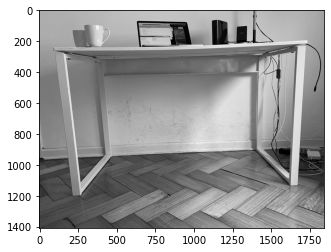

In [ ]:
I = cv2.imread('mesa.png',0)
plt.imshow(I,cmap='gray')
plt.show()

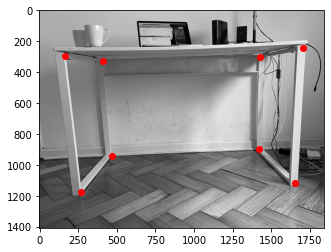

In [ ]:
 u = np.array([  268,  166, 412, 470, 1654, 1704, 1426, 1420])
 v = np.array([ 1178,  294, 328, 940, 1118,  246,  304,  900])
 o = np.ones((1,len(u)))
 w = np.vstack([u,v,o])

plt.imshow(I,cmap='gray')
plt.scatter(u,v,c='red')
plt.show()

In [ ]:
a =  800 # fondo de la mesa en milimetros
h =  900 # alto de la mesa
c = 1250 # ancho de la mesa
p0 = np.array([   a,    0,    0, 1]).reshape(4,1)
p1 = np.array([   a,    0,    h, 1]).reshape(4,1)
p2 = np.array([   0,    0,    h, 1]).reshape(4,1)
p3 = np.array([   0,    0,    0, 1]).reshape(4,1)
p4 = np.array([   a,    c,    0, 1]).reshape(4,1)
p5 = np.array([   a,    c,    h, 1]).reshape(4,1)
p6 = np.array([   0,    c,    h, 1]).reshape(4,1)
p7 = np.array([   0,    c,    0, 1]).reshape(4,1)

M = np.hstack([p0,p1,p2,p3,p4,p5,p6,p7])
M

array([[ 800,  800,    0,    0,  800,  800,    0,    0],
       [   0,    0,    0,    0, 1250, 1250, 1250, 1250],
       [   0,  900,  900,    0,    0,  900,  900,    0],
       [   1,    1,    1,    1,    1,    1,    1,    1]])

In [ ]:
P = calibra(M,w)
print(P)

[[array([-0.35383558]) array([0.78038844]) array([-0.09306891])
  array([468.29419683])]
 [array([-0.16467817]) array([-0.01722489]) array([-0.69778027])
  array([937.6573068])]
 [array([-0.00039671]) array([1.45711356e-05]) array([-7.44849298e-05]) 1]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


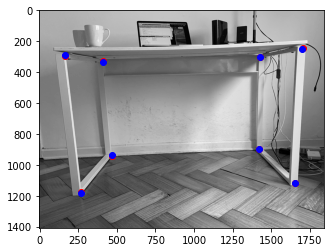

In [ ]:
plt.imshow(I,cmap='gray')
plt.scatter(w[0,:],w[1,:],c='red')

ws = np.dot(P,M)
ws = ws/ws[-1]
plt.scatter(ws[0,:],ws[1,:],c='blue')

plt.show()

In [ ]:
np.fix(ws)
w =  w = np.vstack([u,v])

print('Puntos medidos:')
print(w[0:2,:])
print('Puntos estimados:')
print(np.fix(ws[0:2,:]))


Puntos medidos:
[[ 268  166  412  470 1654 1704 1426 1420]
 [1178  294  328  940 1118  246  304  900]]
Puntos estimados:
[[271 164 412 468 1656 1699 1429 1417]
 [1180 289 331 937 1119 246 302 899]]


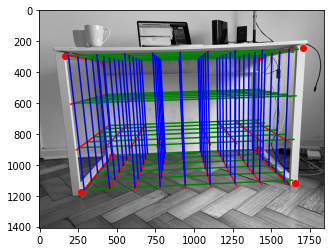

In [ ]:
plt.imshow(I,cmap='gray')
plt.scatter(w[0,:],w[1,:],c='red')

for Z in range(0,h+1,300):
  for Y in range(0,c,150):
    q0 = np.array([   0,    Y,    Z, 1]).reshape(4,1)
    q1 = np.array([   a,    Y,    Z, 1]).reshape(4,1)
    Mq = np.hstack([q0,q1])
    wq = np.dot(P,Mq)
    wq = wq/wq[-1]
    plt.plot(wq[0,:],wq[1,:],color='r')

for Z in range(0,h+1,300):
  for X in range(0,a,150):
    q0 = np.array([   X,    0,    Z, 1]).reshape(4,1)
    q1 = np.array([   X,    c,    Z, 1]).reshape(4,1)
    Mq = np.hstack([q0,q1])
    wq = np.dot(P,Mq)
    wq = wq/wq[-1]
    plt.plot(wq[0,:],wq[1,:],color='g')

for Y in range(0,c,150):
  for X in range(0,a,150):
    q0 = np.array([   X,    Y,    0, 1]).reshape(4,1)
    q1 = np.array([   X,    Y,    h, 1]).reshape(4,1)
    Mq = np.hstack([q0,q1])
    wq = np.dot(P,Mq)
    wq = wq/wq[-1]
    plt.plot(wq[0,:],wq[1,:],color='b')

plt.show()